# 백준 14867(https://www.acmicpc.net/problem/14867)

 
용량이 다른 두 개의 빈 물통 A, B가 있다. 이 물통들에 물을 채우고 비우는 일을 반복하여 두 물통을 원하는 상태(목표하는 양의 물을 담은 상태)가 되도록 만들고자 한다. 물통 이외에는 물의 양을 정확히 잴 수 있는 방법이 없으며, 가능한 작업은 다음과 같은 세 종류가 전부이다.

[F(x): Fill x]: 물통 x에 물을 가득 채운다. (물을 채우기 전에 물통 x가 비어있는지 여부는 관계없음. 다른 물통은 그대로 둠)
[E(x): Empty x]: 물통 x의 물을 모두 버린다. (다른 물통은 그대로 둠)
[M(x,y): Move water from x to y)]: 물통 x의 물을 물통 y에 붓는다. 이때 만약 물통 x에 남아 있는 물의 양이 물통 y에 남아 있는 빈 공간보다 적거나 같다면 물통 x의 물을 물통 y에 모두 붓는다. 만약 물통 x에 남아 있는 물의 양이 물통 y에 남아 있는 빈 공간보다 많다면 부을 수 있는 만큼 최대로 부어 물통 y를 꽉 채우고 나머지는 물통 x에 남긴다.
예를 들어, 물통 A와 B의 용량이 각각 2리터와 5리터라고 하자. 두 물통 모두 빈 상태에서 시작하여 최종적으로 물통 A에는 2리터, 물통 B에는 4리터 물을 남기길 원할 경우, 다음과 같은 순서로 작업을 수행하면 총 8회의 작업으로 원하는 상태에 도달할 수 있다.

(0,0)→[F(B)]→(0,5)→[M(B,A)]→(2,3)→[E(A)]→(0,3)→[M(B,A)]→(2,1)→[E(A)]→(0,1)→[M(B,A)]→(1,0)→[F(B)]→(1,5)→[M(B,A)]→(2,4)

하지만, 작업 순서를 아래와 같이 한다면 필요한 작업 총 수가 5회가 된다.

(0,0)→[F(A)]→(2,0)→[M(A,B)]→(0,2)→[F(A)]→(2,2)→[M(A,B)]→(0,4)→[F(A)]→(2,4)

두 물통의 용량과 원하는 최종 상태를 입력으로 받은 후, 두 물통이 비어 있는 상태에서 시작하여 최종 상태에 도달하기 위한 최소 작업 수를 구하는 프로그램을 작성하시오.

> 입력: 표준 입력으로 물통 A의 용량을 나타내는 정수 a(1 ≤ a < 100,000), 물통 B의 용량을 나타내는 정수 b(a < b ≤ 100,000), 최종 상태에서 물통 A에 남겨야 하는 물의 용량을 나타내는 정수 c(0 ≤ c ≤ a), 최종 상태에서 물통 B에 남겨야 하는 물의 용량을 나타내는 정수 d(0 ≤ d ≤ b)가 공백으로 분리되어 한 줄에 주어진다.

> 출력:  목표 상태에 도달하는 최소 작업 수를 나타내는 정수를 표준 출력으로 출력한다. 만약 목표 상태에 도달하는 방법이 없다면 –1을 출력한다.

> 서브태스크
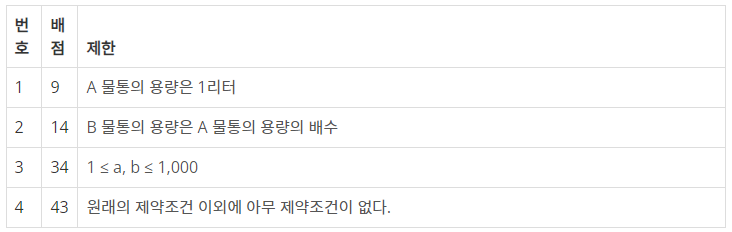

## 1. Python solution1

In [9]:
from collections import deque

a, b, c, d = map(int, input().split(' '))
queue = deque([(0, 0, 0)])
visit = set()
found = False

def visited(dis, nx, ny):
    if (nx, ny) not in visit:
        queue.append((dis, nx, ny))
        visit.add((nx, ny))
        
while queue:
    dis, A, B = queue.popleft()
    
    if A == c and B == d:
        print(dis)
        found = True
        break
        
    # F(a)
    visited(dis + 1, a, B)
    
    # F(b)
    visited(dis + 1, A, b)
    
    # E(a)
    visited(dis + 1, 0, B)
    
    # E(b)
    visited(dis + 1, A, 0)
    
    # M(a, b)
    if (A + B) < b:
        visited(dis + 1, 0, A + B)
    else:
        visited(dis + 1, A + B - b, b)
        
    # M(b, a)
    if (A + B) < a:
        visited(dis + 1, A + B, 0)
    else:
        visited(dis + 1, a, A + B - a)
    
if not found:
    print(-1)

2 5 0 1
5
